# Sensitivity of DIC to pH and *p*CO<sub>2</sub>

*Based on **CO2SYSExample1.m** for MATLAB by Steven van Heuven.*

## Introduction

This is an example of the use of PyCO2SYS that uses its ability to process arrays of data.

We will generate a figure that shows the sensitivity of pH and *p*CO<sub>2</sub> to changes in DIC, while keeping everything else constant.

You can find further information about this way of using PyCO2SYS [in its documentation](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/).

## Define input conditions

The first step is to define the input conditions that we want to use with PyCO2SYS. In this case, every input has a single constant value except for DIC (`par2`), which is a NumPy array of values increasing from 2100 to 2300 μmol·kg<sup>-1</sup> in increments of 5 μmol·kg<sup>-1</sup>:

In [1]:
# Import NumPy to make the DIC array
import numpy as np

# Define input conditions
kwargs = dict(
    par1 = 2400,  # Value of the first parameter
    par2 = np.arange(2100, 2305, 5),  # Value of the second parameter, which is a long vector of different DIC's!
    par1_type = 1,  # The first parameter supplied is of type "1", which is "alkalinity"
    par2_type = 2,  # The second parameter supplied is of type "2", which is "DIC"
    salinity = 35,  # Salinity of the sample
    temperature = 10,  # Temperature at input conditions
    total_silicate = 50,  # Concentration of silicate  in the sample (in umol/kg)
    total_phosphate = 2,  # Concentration of phosphate in the sample (in umol/kg)
    opt_k_carbonic = 4,  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
    opt_k_bisulfate = 1,  # Choice of HSO4- dissociation constants KSO4 ("1" means "Dickson")
)
print("Input conditions have been set!")

Input conditions have been set!


## Run PyCO2SYS

Once we have defined the input conditions above, solving the marine carbonate system is as simple as importing and running the `pyco2.sys` function:

In [2]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run CO2SYS!
results = pyco2.sys(**kwargs)
print('PyCO2SYS ran successfully!')

PyCO2SYS ran successfully!


## Visualise the results

Finally, we can easily visualise the results using a plotting package such as Matplotlib:

<IPython.core.display.Javascript object>


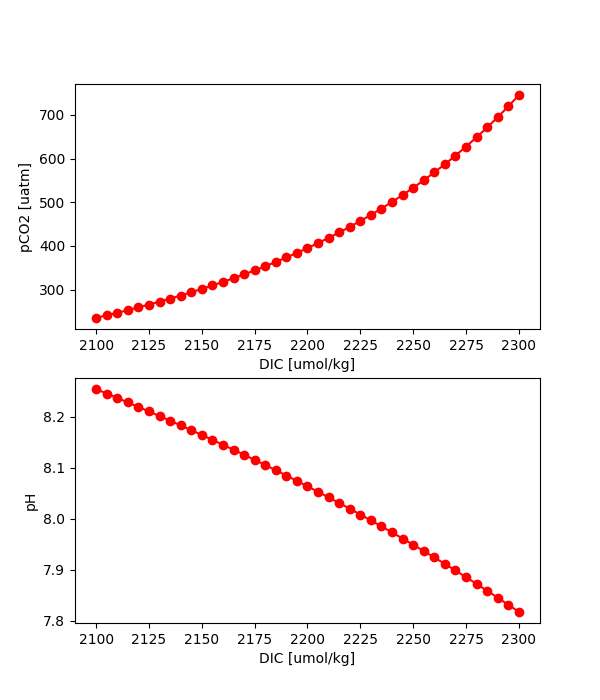

In [3]:
# Import plotting package
from matplotlib import pyplot as plt
%matplotlib notebook

# Prepare an empty figure
fig, ax = plt.subplots(2, 1, figsize=(6, 7))

# The calculated pCO2's are in the field 'pCO2' of the results CO2dict
# Show these in the first subplot
ax[0].plot('par2', 'pCO2', data=results, c='r', marker='o')
ax[0].set_xlabel("DIC [umol/kg]")
ax[0].set_ylabel("pCO2 [uatm]")

# The calculated pH's are in the field 'pH' of the results CO2dict
# Show these in the second subplot
ax[1].plot('par2', 'pH', data=results, c='r', marker='o')
ax[1].set_xlabel("DIC [umol/kg]")
ax[1].set_ylabel("pH");